<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [231]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Asya\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# confidential info
DBNAME = 
USER = 
PASSWORD = 
HOST = 
PORT = 

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [16]:
# текст запроса
query = f'''select COUNT (*) 
            from vacancies 
            
         '''

In [17]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-17-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [19]:
# текст запроса
query = f'''select COUNT (*) 
            from employers 
            
         '''

In [20]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-20-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [21]:
# текст запроса
query = f'''select COUNT (*) 
            from areas 
            
         '''

In [22]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-22-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [23]:
# текст запроса
query = f'''select COUNT (*) 
            from industries 
            
         '''

In [24]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-24-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,294


***

In [ ]:
# выводы по предварительному анализу данных

В базе содержится 49197 вакансий и 23501 работодатель. Таким образом, можно сказать, что каждый присутствующий в базе работодатель размещает в среднем по 2 вакансии. Однако, как мы увидим далее, распределение вакансий между работодателями чень неравномерно за счет компаний-гигантов.
Присутствующие работодатели классифицируются по своему региону регистрации, которых здесь насчитывается 1362. Под регионом здесь понимается населенный пункт, но, как мы опять же увидим в дальнейшем, не всегда.
Также работодатели могут указать, к каким сферам деятельности они относятся - таких сфер база насчитывет 294.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [225]:
# текст запроса
query = '''select COUNT (*) , areas.name
            from vacancies left join areas on vacancies.area_id=areas.id
            group by area_id, areas.name
            order by count desc
                      
         '''

In [226]:
# результат запроса
df_top_vac = pd.read_sql_query(query, connection)
df_top_vac

<ipython-input-226-8838848240b1>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_vac = pd.read_sql_query(query, connection)


,count,name
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Кобрин
765,1,Духовщина
766,1,Новогрудок
767,1,Дорогобуж


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [54]:
# текст запроса
query = '''select COUNT (*) 
            from vacancies 
            where salary_from is not null OR salary_to is not null          
         '''

In [55]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-55-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [66]:
# текст запроса
query = '''select round (avg (salary_from)) as average_min_salary,  round (avg (salary_to)) as average_max_salary
            from vacancies 
                      
         '''

In [67]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-67-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,average_min_salary,average_max_salary
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [227]:
# текст запроса
query = '''select count(*), schedule, employment
            from vacancies 
            group by schedule, employment
            order by count desc
                      
         '''

In [228]:
# результат запроса
df_day = pd.read_sql_query(query, connection)
df_day

<ipython-input-228-0185b5579580>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_day = pd.read_sql_query(query, connection)


,count,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [229]:
# текст запроса
query = '''select count(*), experience
            from vacancies 
            group by experience
            order by count asc
                      
         '''

In [230]:
# результат запроса
df_exp = pd.read_sql_query(query, connection)
df_exp

<ipython-input-230-9ee269b4269a>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_exp = pd.read_sql_query(query, connection)


,count,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

In [ ]:
# выводы по детальному анализу вакансий

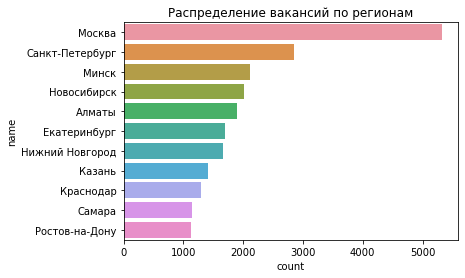

In [239]:
sns.barplot(data=df_top_vac.loc[:10], x='count', y='name')
plt.title('Распределение вакансий по регионам');

Анализируя распределение вакансий по регионам, можно заметить, что представлен рынок работодателей не только России, но и СНГ: В топ-5 городов по количеству вакансий, помимо ожидаемых Москвы и Санкт-Петербурга, входят также Минск и Алматы.

Хотя бы одна из границ зарплатной вилки указана лишь в половине вакансий. Что подтверждает определенную черту культуры отечественного рынка труда - непопулярность открытых разговоров о деньгах.

Text(0.5, 1.0, 'Требуемый рабочий график')

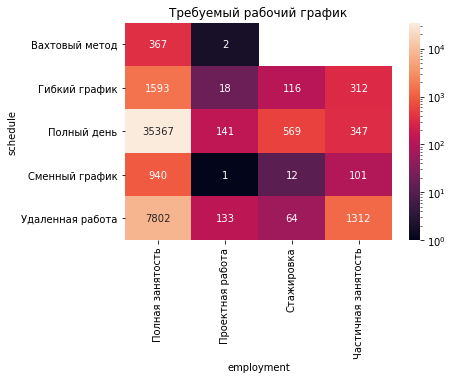

In [257]:
from matplotlib.colors import LogNorm, Normalize
pivot = df_day.pivot_table(values='count',index='schedule', columns='employment')
sns.heatmap(pivot, annot=True, norm=LogNorm(), fmt='g')
plt.title('Требуемый рабочий график')

Можно заметить, что 2/3 вакансий ( > 35 тыс.) предполагают полный день и полную занятость. На втором месте по популярности (7.8 тыс. вакансий) - также полная занятость, и при этом работа удаленная. Остальные типы графиков предлагаются значительно реже.

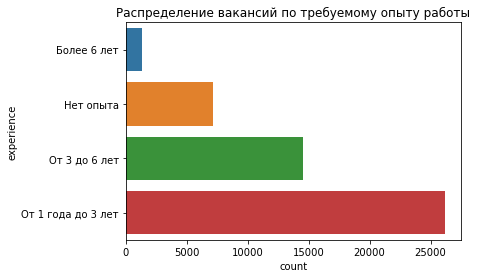

In [258]:
sns.barplot(data=df_exp, x='count', y='experience')
plt.title('Распределение вакансий по требуемому опыту работы');

Более половины вакансий ожидает кандидатов с опытом 1-3 года. Еще более четверти вакансий - с опытом 3-6 лет. Удивительно, но меньше всего вакансий - для кадидатов с наибольшим опытом, более 6 лет.

# Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [261]:
# текст запроса
query = '''select count(*), employers.name
            from vacancies left join employers on vacancies.employer_id = employers.id
            group by employers.id
            order by count desc
            limit 5          
         '''

In [262]:
# результат запроса
df_top_comp = pd.read_sql_query(query, connection)
df_top_comp

<ipython-input-262-8693918c0844>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_comp = pd.read_sql_query(query, connection)


,count,name
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [100]:
# текст запроса
query = '''select areas.name as region, count(vacancies.id) as N_vacancies, count( distinct employers.id) as N_employers
            from areas left join vacancies on vacancies.area_id = areas.id
               left join employers on employers.area = areas.id
            group by areas.id
            having count(vacancies.id) = 0
            order by n_employers desc
            limit 1          
         '''

In [101]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-101-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,region,n_vacancies,n_employers
0,Россия,0,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [269]:
query = '''select count (distinct area_id) as N_of_areas, employers.name as company_name
            from vacancies left join employers on vacancies.employer_id = employers.id
            group by employer_id , employers.name
            order by count (distinct area_id) desc
            '''

In [272]:
# результат запроса
df_comp_areas = pd.read_sql_query(query, connection)
df_comp_areas

<ipython-input-272-a06fcf14ec80>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_comp_areas = pd.read_sql_query(query, connection)


,n_of_areas,company_name
0,181,Яндекс
1,152,Ростелеком
2,116,Спецремонт
3,88,Поляков Денис Иванович
4,71,ООО ЕФИН
...,...,...
14901,1,НПП Авиатрон
14902,1,Центр дистанционных торгов
14903,1,Городские Телекоммуникационные Системы
14904,1,"Введенский, Отель"


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [129]:
# текст запроса
query = '''select count (*)
            from employers left join employers_industries on employers.id = employers_industries.employer_id
            where industry_id is null      
         '''

In [130]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-130-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [145]:
# текст запроса
query = '''select count(industry_id) as N_of_industries, employers.name
            from employers left join employers_industries 
                on employers.id = employers_industries.employer_id
            group by employers.id
             having count(industry_id) = 4
             order by employers.name asc
             offset 2
             limit 1
         '''

In [146]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-146-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,n_of_industries,name
0,4,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [153]:
# текст запроса
query = '''select count (distinct employer_id)
            from  employers_industries left join industries
                on industries.id = employers_industries.industry_id
            where industries.name = 'Разработка программного обеспечения'
       
         '''

In [154]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-154-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [212]:
# код для получения списка городов-милионников
from bs4 import BeautifulSoup
# Импортируем библиотеку requests
import requests

cities = []

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')

tables = page.find_all("table") #получаем список таблиц
tables
for table in tables[1]:
    links = table.find_all("a") #список всех ссылок
    for link in links[3:]:
        try: # ловим исключение KeyError, ибо атрибут title есть не у всех ссылок
            cities.append(link["title"]) #выводим значение атрибута
        except KeyError:
            pass
    
cities = tuple(cities)    
cities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [278]:
# текст запроса
query = f'''(select areas.name, count (*)
            from vacancies left join employers on vacancies.employer_id = employers.id
                left join areas on areas.id = vacancies.area_id            
            where employers.name = 'Яндекс' AND areas.name IN {cities}
            group by employer_id , area_id, areas.name
            
            UNION ALL
         select 'total', count (*)        
            from vacancies left join employers on vacancies.employer_id = employers.id
                left join areas on areas.id = vacancies.area_id            
            where employers.name = 'Яндекс')
            order by name asc
            
            '''

In [283]:
# результат запроса
df_mln = pd.read_sql_query(query, connection)
df_mln

<ipython-input-283-8fcb0543b12f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mln = pd.read_sql_query(query, connection)


,name,count
0,total,1933
1,Волгоград,24
2,Воронеж,32
3,Екатеринбург,39
4,Казань,25
5,Краснодар,30
6,Красноярск,23
7,Москва,54
8,Нижний Новгород,36
9,Новосибирск,35


***

In [ ]:
# выводы по анализу работодателей

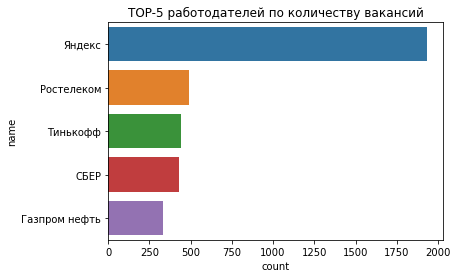

In [268]:
sns.barplot(data=df_top_comp, x='count',y='name')
plt.title('TOP-5 работодателей по количеству вакансий');

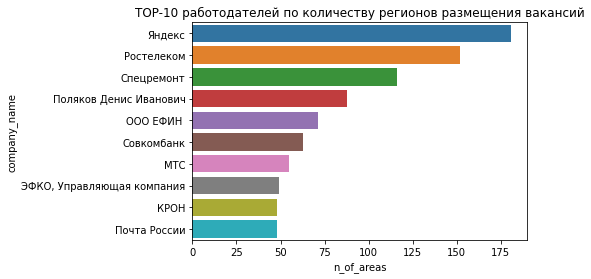

In [277]:
sns.barplot(data=df_comp_areas.loc[:9], x='n_of_areas',y='company_name')
plt.title('TOP-10 работодателей по количеству регионов размещения вакансий');

По количеству размещенных вакансий (4% от общего числа) с большим отрывом лидирует Яндекс. Отметим, что остальные члены топ-5 - также находящиеся на слуху компании.од
Также, Яндекс является рекордсменом по количеству регионов (населенных пунктов), в которых он публикует свои вакансии. Однако в этом от него недалеко отстает Ростелеком.
Однако, интересно отметить, что из 1933 вакансий Яндекса в городах-миллионниках находится только 485. При наличии интереса в этой теме можно провести дополнительное исследование: находятся ли остальные вакансии без указания города/предполагают удаленную работу неважно откуда (предпочтительная гипотеза) или находятся в более мелких населеных пунктах.

# Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [285]:
# текст запроса
query = '''select count(*)
            from vacancies
            where name like '%data%' OR name like '%Data%' OR name like '%DATA%' 
                OR name like '%данн%' OR name like '%Данн%' OR name like '%ДАНН%' 
         '''

In [289]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

<ipython-input-289-459dacfcce03>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
1. 'data scientist'
2. 'data science'
3. 'исследователь данных'
4. 'ML' (здесь не нужно брать вакансии по HTML)
5. 'machine learning'
6. 'машинн%обучен%'

**В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [323]:
# текст запроса
query = '''select name, experience, employment
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%') 
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND ( LOWER(name) like '%junior%' OR experience = 'Нет опыта' OR employment = 'Стажировка')
                
         '''

In [324]:
# результат запроса
df_jun_ds = pd.read_sql_query(query, connection)
display(df_jun_ds)
len(df_jun_ds)

<ipython-input-324-c520938ffc50>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_jun_ds = pd.read_sql_query(query, connection)


,name,experience,employment
0,Junior+ CV/ML developer,От 1 года до 3 лет,Полная занятость
1,Data Scientist (Junior+),От 1 года до 3 лет,Полная занятость
2,Junior Data Scientist (Стажер),Нет опыта,Стажировка
3,"Математик, Junior/Middle/Senior Data Scientist",От 1 года до 3 лет,Частичная занятость
4,Junior Data Scientist,Нет опыта,Полная занятость
5,Data Scientist/Machine Learning Engineer (Deve...,Нет опыта,Частичная занятость
6,Data Scientist (Junior),Нет опыта,Частичная занятость
7,Intern/Junior Data Scientist,Нет опыта,Стажировка
8,Junior Data Scientist (VK),От 1 года до 3 лет,Полная занятость
9,Junior/Middle Data Scientist,От 1 года до 3 лет,Полная занятость


51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

**Критерии для отнесения вакансии к DS указаны в предыдщуем задании.*

In [314]:
# текст запроса
query = '''select count(*)
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND (UPPER(key_skills) like '%SQL%' OR LOWER(key_skills) like '%postgres%')
                
         '''

In [315]:
# результат запроса
df_sql = pd.read_sql_query(query, connection)
df_sql

<ipython-input-315-039f8c16f501>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql_query(query, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

**Это можно сделать помощью запроса, аналогичного предыдущему.*

In [316]:
# текст запроса
query = '''select count(*)
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND (LOWER(key_skills) like '%python%')
                
         '''

In [317]:
# результат запроса
df_py = pd.read_sql_query(query, connection)
df_py

<ipython-input-317-259dd703b971>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_py = pd.read_sql_query(query, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [328]:
# текст запроса
query = '''select  key_skills
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')'''

In [351]:
# результат запроса

def skillcounter(x):
    if x is None:
        return 0
    else:
        return x.count('\t')+1

df = pd.read_sql_query(query, connection)
df['n_skills'] = df['key_skills'].apply(skillcounter)
display(df)
print('mean number of skills: ', round(df['n_skills'].mean(),2))

<ipython-input-351-fd719199f158>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,key_skills,n_skills
0,Python\tSQL\tРабота в команде\tOpenCV\tML,5
1,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,9
2,Python\tOpenCV\tTensorflow\tComputer Vision\tН...,8
3,Python\tFlask\tLinux\tAWS\tGit,5
4,Python\tSQL\tNLP\tScikit-learn\tMachine Learning,5
...,...,...
475,Python\tNumpy\tPyTorch\tPandas\tМатематический...,9
476,Python\tScikit-learn\tPandas\tGit\tNumpy,5
477,Qt\tООП\tC++\tMS Visual Studio\tРазработка ком...,6
478,SCALA\tSQL\tМатематический анализ\tСтатистичес...,7


mean number of skills:  5.75


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем **указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

##### для начала просто потренируемся получать среднюю зп в вакансии:

In [378]:
# текст запроса
query = f'''select salary_from, salary_to, (coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2 as mean
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND (salary_from is not null OR salary_to is not null)
         
            '''
#group by experience

In [379]:
# результат запроса
df_salary = pd.read_sql_query(query, connection)
df_salary

<ipython-input-379-fa11f2fdafbb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary = pd.read_sql_query(query, connection)


,salary_from,salary_to,mean
0,50000.0,70000.0,60000
1,50000.0,100000.0,75000
2,60000.0,NaN,60000
3,NaN,37000.0,37000
4,50000.0,NaN,50000
...,...,...,...
57,100000.0,NaN,100000
58,NaN,292242.0,292242
59,NaN,175000.0,175000
60,115000.0,172000.0,143500


In [382]:
# текст запроса
query = f'''select experience, AVG ((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2)  as mean
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND (salary_from is not null OR salary_to is not null)
             group by experience
            '''
#

In [383]:
# результат запроса
df_mean_salary = pd.read_sql_query(query, connection)
df_mean_salary

<ipython-input-383-a777afd4492a>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mean_salary = pd.read_sql_query(query, connection)


,experience,mean
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


***

In [ ]:
# выводы по предметному анализу

В базе 1771 вакансия, так или иначе связанная с данными (в своем названии). 
Однако хочется узнать, сколько же из них - именно DS:


In [387]:
query = '''select name, experience, employment
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%') 
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')                
         '''
df_ds = pd.read_sql_query(query, connection)
display(df_ds)
len(df_ds)

<ipython-input-387-382f491b782d>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds = pd.read_sql_query(query, connection)


,name,experience,employment
0,Junior+ CV/ML developer,От 1 года до 3 лет,Полная занятость
1,Data Scientist,От 1 года до 3 лет,Полная занятость
2,Data Scientist (Junior+),От 1 года до 3 лет,Полная занятость
3,AI/ML Senior Engineer,От 3 до 6 лет,Полная занятость
4,Data Scientist,От 1 года до 3 лет,Полная занятость
...,...,...,...
475,Специалист ML/DS,От 3 до 6 лет,Полная занятость
476,Data Scientist в области рекомендательных систем,От 3 до 6 лет,Полная занятость
477,C++ разработчик (QML),От 3 до 6 лет,Полная занятость
478,Middle+/Senior Data Scientist,От 3 до 6 лет,Полная занятость


480

Таким образом, для DS есть 480 вакансий; Из них только 10%, 51шт. - для начинающего дата-сайентиста.
Из всех DS-вакансий, в 201 (меньше половины) требуется знание SQL, и в гораздо большем количестве (351 шт.) указан Python.

Text(0.5, 1.0, 'Средняя зарплата в вакансии в зависимости от опыта')

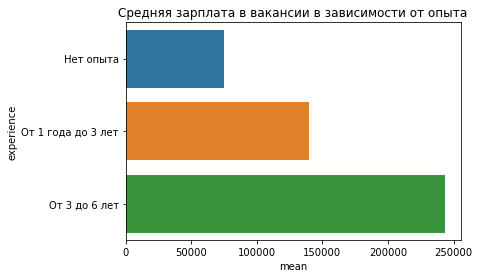

In [394]:
sns.barplot(data = df_mean_salary, x = 'mean', y = 'experience')
plt.title('Средняя зарплата в вакансии в зависимости от опыта')

С количеством лет опыта средняя зарплата в Data Science  значительно увеличивается: без опыта в среднем можно рассчитывать на около 75 тыс.р., в то время как с опытом 3-6 лет средняя зарплата в вакансии уже в 3 раза больше. Вакансии с опытом более 6 лет в DS найдены не были. 

In [342]:
# не забываем закрыть соединение после окончания работы
connection.close()

# Общий вывод по проекту

Интегрируя Python и SQL, мы получаем мощный инструмент для анализа данных.
В текущем проекте продемонстрирована лишь небольшая часть возможностей по анализу, который можно реализовать, имея базу данных вакансий с популярного сайта по поиску работы.

На HeadHunter представлено около 50 тысяч вакансий от более 20 тысяч работодателей в 1362 населенных пунктах по 294 сфере деятельности. Было проанализировано распределение вакансий по регионам, типам занятости, вилкам зарплат.

Были кратко проанализированы вакансии в области анализа данных и, в частности, в DS. Выяснено, что доля вакансий для начинающих DS очень мала, и зарплата не выглядит высокой. Однако с ростом опыта размер предлагаемой зарплаты значительно увеличивается.

В зависимости от целей исследования, оно может быть далее продолжено в разных направлениях. Если это исследование рынка кандидатом, то можно было бы сосредоточиться на массиве подходящих вакансий (допустим, для джуна) и:
* извлечь топ ожидаемых скиллов
* посмотреть распределение зарплат по регионам
* выяснить предлагаемые графики работы и корреляцию с ними зарплат
* выяснить самых вероятных работодателей (много размещающих подходящие вакансии).

Отметим, что, к сожалению, нам неизвестна дата выгрузки базы с сайта, следовательно насколько актуальна предоставленная информация о рынке на данный момент.